In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV_HB/set4/training_set'
valid_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV_HB/set4/validation_set'
test_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV_HB/set4/testing_set'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)

Found 192 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)    

In [8]:
for layer in model.layers:
    layer.trainable = False

In [9]:
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
model.compile(Adam(learning_rate=.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=18, verbose=2)

Epoch 1/18
6/6 - 100s - loss: 10.9428 - accuracy: 0.4792 - val_loss: 0.9155 - val_accuracy: 0.7865 - 100s/epoch - 17s/step
Epoch 2/18
6/6 - 96s - loss: 4.0638 - accuracy: 0.6771 - val_loss: 6.6455 - val_accuracy: 0.5208 - 96s/epoch - 16s/step
Epoch 3/18
6/6 - 96s - loss: 3.6064 - accuracy: 0.6719 - val_loss: 7.3905 - val_accuracy: 0.6042 - 96s/epoch - 16s/step
Epoch 4/18
6/6 - 96s - loss: 3.2681 - accuracy: 0.7708 - val_loss: 3.3171 - val_accuracy: 0.7240 - 96s/epoch - 16s/step
Epoch 5/18
6/6 - 95s - loss: 1.5049 - accuracy: 0.8385 - val_loss: 2.3663 - val_accuracy: 0.7812 - 95s/epoch - 16s/step
Epoch 6/18
6/6 - 96s - loss: 1.1543 - accuracy: 0.8438 - val_loss: 1.3524 - val_accuracy: 0.8385 - 96s/epoch - 16s/step
Epoch 7/18
6/6 - 101s - loss: 0.8519 - accuracy: 0.8750 - val_loss: 1.7798 - val_accuracy: 0.8125 - 101s/epoch - 17s/step
Epoch 8/18
6/6 - 99s - loss: 0.7614 - accuracy: 0.8906 - val_loss: 0.7598 - val_accuracy: 0.8490 - 99s/epoch - 16s/step
Epoch 9/18
6/6 - 97s - loss: 0.4723

In [13]:
test_imgs, test_labels = next(test_batches)

In [14]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [15]:
predictions = model.predict(test_batches, steps = 1, verbose = 0)
predictions

array([[5.30834170e-03, 9.94691730e-01],
       [1.93446205e-04, 9.99806643e-01],
       [2.38112043e-05, 9.99976099e-01],
       [9.99960840e-01, 3.91284884e-05],
       [3.81167702e-05, 9.99961793e-01],
       [9.50569179e-10, 9.99999940e-01],
       [1.71492560e-04, 9.99828577e-01],
       [1.34089655e-08, 9.99999940e-01],
       [9.23824966e-01, 7.61750489e-02],
       [3.96692631e-04, 9.99603331e-01],
       [9.50665534e-01, 4.93344255e-02],
       [6.46872923e-06, 9.99993503e-01],
       [9.99929965e-01, 7.00166420e-05],
       [5.00652269e-02, 9.49934721e-01],
       [9.38340425e-01, 6.16596565e-02],
       [9.99999940e-01, 2.01998899e-12],
       [9.99744773e-01, 2.55313207e-04],
       [1.39323900e-10, 9.99999940e-01],
       [4.99251764e-04, 9.99500692e-01],
       [9.99999940e-01, 6.36315312e-09],
       [9.99999940e-01, 4.91861055e-13],
       [9.36873734e-01, 6.31261766e-02],
       [4.55839972e-06, 9.99995410e-01],
       [1.67324750e-08, 9.99999940e-01],
       [6.850562

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[18  1]
 [ 3 10]]


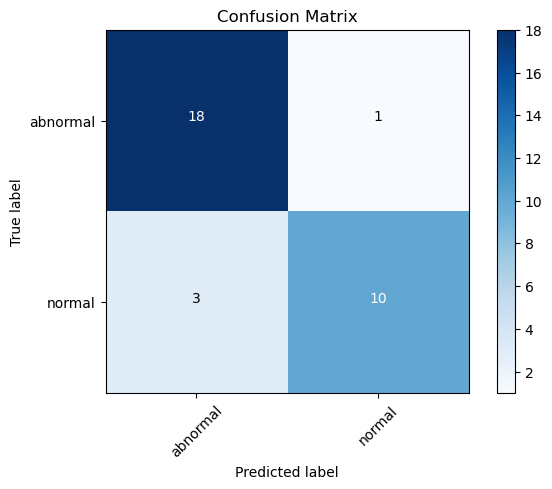

In [18]:
cm_plot_labels = ['abnormal', 'normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')